<a href="https://colab.research.google.com/github/VincentChong123/sutd-stats-team5-prj/blob/main/Team_5_Project_(JH)_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

We investigated 3 business objectives and presented their respective conclusion and supporting statistical test result.

|Business objective|Finding|Supporting test result|
|-|-|-|
|-|-|-|
|-|-|-|
|-|-|-|


**Normality test using Shapiro-Wilk Test bold text**

tests If data is normally distributed 

**Assumption** : Observations are identically distributed

In [123]:
IS_RUNNING_GOOGLE_COLAB = True

In [124]:
# Follow PEP08 recommendation, import library first
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import pytz


import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import seaborn as sns

from statsmodels.stats.diagnostic import normal_ad
from sklearn.preprocessing import QuantileTransformer



In [125]:
import pytz
dt.timezone(offset=dt.timedelta(hours=+8))
print("-"*20)
starttime = dt.datetime.now(pytz.timezone('Singapore'))
print(f"START time {str(starttime).split('.')[0]}")
print(f"\tcheck END time at the final cell output \n\tto confirm the notebook is successfully executed till the end")

--------------------
START time 2022-05-09 21:42:53
	check END time at the final cell output 
	to confirm the notebook is successfully executed till the end


In [126]:
# for Google colab execution
if IS_RUNNING_GOOGLE_COLAB:
  from google.colab import drive
  import zipfile
  drive.mount('/content/drive')
  project_dir = "/content/drive/.shortcut-targets-by-id/1hq1js1i_5vtP8Ib96QdKM31o5JrADOez/sutd-team5-prj/" #don't change
  data_dir = project_dir + "dataset/"
  src_dir = project_dir + "src/"

else:
  project_dir = "/content/drive/.shortcut-targets-by-id/1hq1js1i_5vtP8Ib96QdKM31o5JrADOez/sutd-team5-prj/" 
  data_dir = project_dir + "dataset/"
  src_dir = project_dir + "src/"  

# set source director
os.chdir(src_dir)
print(f"current working directory is {os.getcwd()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
current working directory is /content/drive/.shortcut-targets-by-id/1hq1js1i_5vtP8Ib96QdKM31o5JrADOez/sutd-team5-prj/src


In [127]:
if IS_RUNNING_GOOGLE_COLAB:
  csv_pathname = data_dir + "Ecommerce - Hour Data.csv"
  zip_pathname = data_dir +  "Ecommerce - Hour Data.zip"

  print(os.path.exists(zip_pathname))
  print(os.getcwd())

  file = zipfile.ZipFile(zip_pathname)
  file.setpassword(pwd = bytes('VNjAMFv268"(*C*y', 'utf-8' ))  

  try: 
    file.extractall(path = data_dir)
    # time.sleep(5)
    mydf = pd.read_csv(data_dir + "Ecommerce - Hour Data.csv")
  
  except:
    print(f"fail to unzip {zip_pathname}")
  
  os.remove(csv_pathname)
  print(f"removed {csv_pathname}")    

else:
  mydf = pd.read_csv(data_dir + "Ecommerce - Hour Data.csv")

True
/content/drive/.shortcut-targets-by-id/1hq1js1i_5vtP8Ib96QdKM31o5JrADOez/sutd-team5-prj/src
removed /content/drive/.shortcut-targets-by-id/1hq1js1i_5vtP8Ib96QdKM31o5JrADOez/sutd-team5-prj/dataset/Ecommerce - Hour Data.csv


In [128]:
print(mydf.columns)
print(f"dataframe without considering order_name (shape {mydf.shape}) ")
display(mydf.head())

mydf_notna = mydf[mydf.order_name.isna()==False]
print(f"dataframe with valid order_name (shape {mydf_notna.shape}) ")
display(mydf_notna.head())
#'total_sales', 'gross_sales', 'average_order_value', 'returned_item_quantity', 
#'gross_profit', 'ordered_item_quantity', 'net_quantity', 'product_type'

Index(['hour', 'adjustment', 'cancelled', 'financial_status',
       'fulfillment_status', 'order_id', 'order_name', 'purchase_option',
       'sale_kind', 'sale_line_type', 'cost_tracked', 'billing_company',
       'billing_city', 'billing_region', 'billing_country',
       'billing_postal_code', 'customer_id', 'customer_type',
       'marketing_event_target', 'marketing_event_type',
       'utm_campaign_content', 'utm_campaign_medium', 'utm_campaign_name',
       'utm_campaign_source', 'utm_campaign_term', 'pos_location_name',
       'product_id', 'product_title', 'product_price', 'product_type',
       'product_vendor', 'variant_id', 'variant_sku', 'variant_title',
       'api_client_title', 'shipping_city', 'shipping_region',
       'shipping_country', 'shipping_postal_code', 'staff_id', 'staff_name',
       'id_of_staff_who_helped_with_sale',
       'name_of_staff_who_helped_with_sale', 'referrer_host', 'referrer_name',
       'referrer_path', 'referrer_source', 'referrer_url', 'o

,hour,adjustment,cancelled,financial_status,fulfillment_status,order_id,order_name,purchase_option,sale_kind,sale_line_type,...,gross_profit,gross_margin,units_per_transaction,customers,pending_sales,net_quantity,ordered_item_quantity,average_units_ordered,returned_item_quantity,percent_of_sales_with_staff_help
0,9/1/2021 0:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
1,9/1/2021 1:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
2,9/1/2021 2:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
3,9/1/2021 3:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0
4,9/1/2021 4:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0


dataframe with valid order_name (shape (2982, 69)) 


,hour,adjustment,cancelled,financial_status,fulfillment_status,order_id,order_name,purchase_option,sale_kind,sale_line_type,...,gross_profit,gross_margin,units_per_transaction,customers,pending_sales,net_quantity,ordered_item_quantity,average_units_ordered,returned_item_quantity,percent_of_sales_with_staff_help
17,9/1/2021 17:00,No,No,paid,fulfilled,3.950000e+12,#1015,One-time,order,product,...,6.09,0.17657,1,1,0,1,1,1,0,0
18,9/1/2021 17:00,No,No,paid,fulfilled,3.950000e+12,#1014,One-time,order,product,...,5.86,0.63351,1,1,0,1,1,1,0,0
19,9/1/2021 17:00,No,No,paid,fulfilled,3.950000e+12,#1014,One-time,order,shipping,...,0.00,0.00000,0,0,0,0,0,0,0,0
20,9/1/2021 17:00,No,No,paid,fulfilled,3.950000e+12,#1014,One-time,order,product,...,0.81,0.17685,1,1,0,1,1,1,0,0
21,9/1/2021 17:00,No,No,paid,fulfilled,3.950000e+12,#1015,One-time,order,shipping,...,0.00,0.00000,0,0,0,0,0,0,0,0


The dataset is an ecommerce 

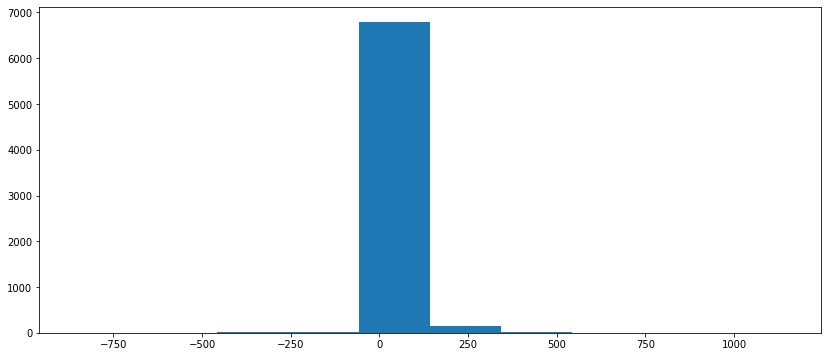

In [129]:
#Checking Histogram
%matplotlib inline
plt.figure(figsize=(14,6))
plt.hist(mydf['total_sales'])
plt.show()

In [130]:
DataToTest = mydf['gross_profit']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.38, p=0.000000000000000000000000000000
Not a normal distribution


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Normality test using K^2 Normality Test Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [131]:
# D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = mydf['gross_profit']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normally distributed')

stat=5306.8532138382, p=0.0000000000
Not Normally distributed


## Check if the feature: 'gross_profit' is normally distributed using  Anderson-Darling test.

In [132]:
alpha_value = 0.05
random_seed = 123

In [133]:
# Anderson-Darling test

(test_statistic, p_value) = normal_ad(mydf['gross_profit'])      

print("The test statistic is: ", round(test_statistic,3))
print("The p-value is: ", round(p_value,3),"\n")

if p_value < alpha_value:
    print("At", alpha_value, "level of significance, we REJECT null hypothesis.")
    print("Conclusion: Sample likely not follow a normal distribution.")
else:
    print("At", alpha_value, "level of significance, we FAILED TO REJECT null hypothesis.")
    print("Conclusion: Sample likely follow a normal distribution.")

The test statistic is:  inf
The p-value is:  0.0 

At 0.05 level of significance, we REJECT null hypothesis.
Conclusion: Sample likely not follow a normal distribution.


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


## Transform the feature: 'gross_profit'  to better fit the normal distribution using QuantileTransformer

In [134]:
#Define function for comparing two plots
def compare_plot(feature, transformed_feature):
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)

    stdDev = np.round(np.std(feature)[0],4) # for normal distribution, standard deviation is 1
    skewness = np.round(skew(feature),4) # for normal distribution, skewness = 0
    excess_kurtosis = np.round(kurtosis(feature),4) # for normal distribution, excess kurtosis = 0
    sns.histplot(feature, kde=True, ax=ax[0], legend=False)
    ax[0].set_xlabel(feature.columns[0])
    ax[0].set_title("ORIGINAL \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(stdDev, skewness, excess_kurtosis));

    transformed_stdDev = np.round(np.std(transformed_feature)[0],4)
    transformed_skewness = np.round(skew(transformed_feature),4)
    transformed_excess_kurtosis = np.round(kurtosis(transformed_feature),4)
    sns.histplot(transformed_feature, kde=True, ax=ax[1], legend=False)
    ax[1].set_xlabel(feature.columns[0])
    ax[1].set_title("TRANSFORMED \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(transformed_stdDev, transformed_skewness, transformed_excess_kurtosis));

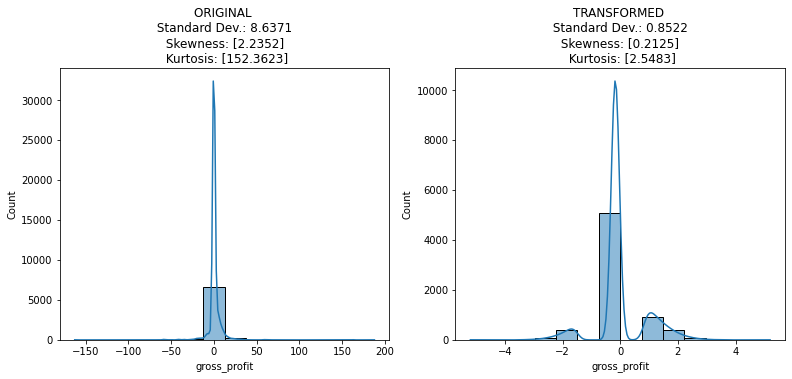

In [135]:

# Select feature
feature = mydf[["gross_profit"]]

# Transformation
quantile = QuantileTransformer(output_distribution='normal', n_quantiles=len(feature)) # with gaussian output
quantile.fit(feature) # to avoid data leakage, only fit to training data
transformed_feature = quantile.transform(feature) # then perform transform on both training data and test data.
transformed_feature = pd.DataFrame(transformed_feature)

# Plot
compare_plot(feature,transformed_feature)

# Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution

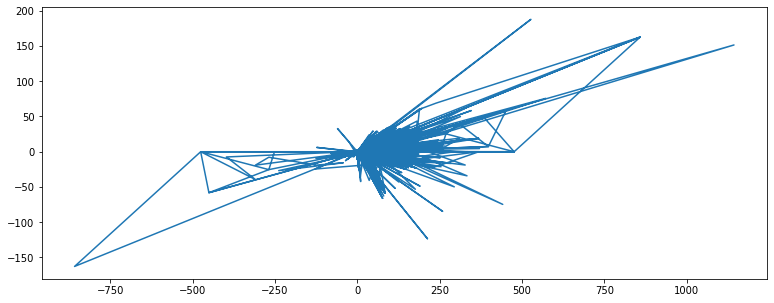

In [136]:
FirstSample = mydf['total_sales']
SecondSample = mydf['gross_profit']

plt.plot(FirstSample,SecondSample)
plt.show()

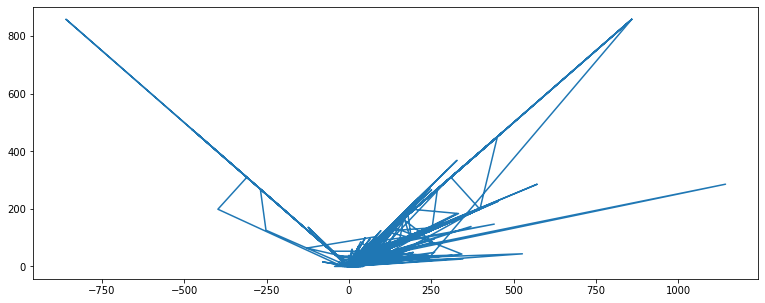

In [137]:
FirstSample = mydf['total_sales']
SecondSample = mydf['product_price']

plt.plot(FirstSample,SecondSample)
plt.show()

In [138]:
#Spearman Rank Correlation

stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.918, p=0.000000
dependent samples


In [139]:
mydf.corr(method="pearson")

,order_id,customer_id,marketing_event_target,utm_campaign_term,pos_location_name,product_id,product_price,variant_id,staff_id,staff_name,...,gross_profit,gross_margin,units_per_transaction,customers,pending_sales,net_quantity,ordered_item_quantity,average_units_ordered,returned_item_quantity,percent_of_sales_with_staff_help
order_id,1.000000,0.997766,NaN,NaN,NaN,0.750269,0.383723,0.750235,NaN,NaN,...,0.107938,0.035964,0.564221,0.736046,NaN,0.541221,0.564221,0.564221,-0.091978,NaN
customer_id,0.997766,1.000000,NaN,NaN,NaN,0.754199,0.382410,0.754278,NaN,NaN,...,0.108887,0.036373,0.565289,0.740884,NaN,0.542760,0.565289,0.565289,-0.088681,NaN
marketing_event_target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utm_campaign_term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_location_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,0.750269,0.754199,NaN,NaN,NaN,1.000000,0.504208,0.999916,NaN,NaN,...,0.145275,0.049330,0.749569,0.981690,NaN,0.719482,0.749569,0.749569,-0.119028,NaN
product_price,0.383723,0.382410,NaN,NaN,NaN,0.504208,1.000000,0.504691,NaN,NaN,...,0.093489,0.010652,0.312903,0.463157,NaN,0.280157,0.312903,0.312903,-0.186024,NaN
variant_id,0.750235,0.754278,NaN,NaN,NaN,0.999916,0.504691,1.000000,NaN,NaN,...,0.145768,0.049512,0.749650,0.981861,NaN,0.719562,0.749650,0.749650,-0.119028,NaN
staff_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
staff_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


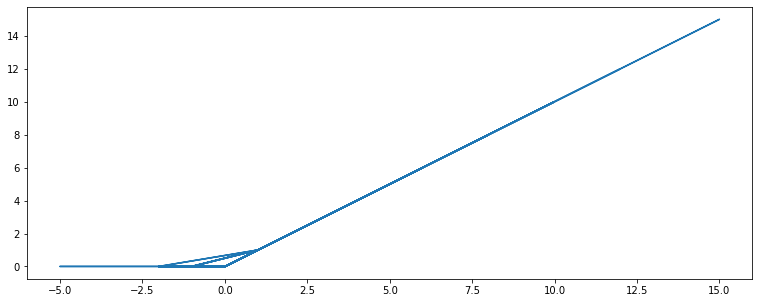

In [140]:
FirstSample = mydf['net_quantity']
SecondSample = mydf['ordered_item_quantity']

plt.plot(FirstSample,SecondSample)
plt.show()

In [141]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.991, p=0.000000
dependent samples


# Correlation of categorical variable - Chi square test

In [142]:
mydf2 = pd.crosstab(mydf['financial_status'], mydf['fulfillment_status'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['shipping_city'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['product_vendor'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['referrer_source'],margins = False)

In [143]:
mydf2

fulfillment_status,fulfilled,partial,unfulfilled
financial_status,,,
paid,2785,0,17
partially_refunded,43,6,0
refunded,30,0,101


In [144]:
stat, p, dof, expected = chi2_contingency(mydf2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=2288.365, p=0.000
dependent categories


In [145]:
print(f"END time {str(dt.datetime.now(pytz.timezone('Singapore'))).split('.')[0]}")

END time 2022-05-09 21:42:58
